# Neural network for regression

## The model

We will hope to approximate the function

\begin{equation}
    f(x,y) = -(x(x-1)+y(1-y)) + \frac{1}{2} \cos(xy)\sin(2x+y),
\end{equation}

in the range $[-3,3]$ using a neural network.

In [ ]:
import numpy as np

def func2approx(x,y):
    f = -(x * (x - 1) + y * (1 - y)) + 0.5 * np.cos(x * y) * np.sin(2 * x + y)
    return f

def generate_data(num_samples):
    X = np.random.rand(num_samples, 2)
    y = func2approx(X[:, 0], X[:, 1])
    return X, y

float64
(1000, 2)
float64
(1000,)
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0533 - mae: 0.1826
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mae: 0.1447
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mae: 0.1270
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mae: 0.1079
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mae: 0.0856
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mae: 0.0584
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0470
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - mae: 0.0401
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mae: 0.0363
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mae: 0.0364
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0359
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mae: 0.0391
Ep

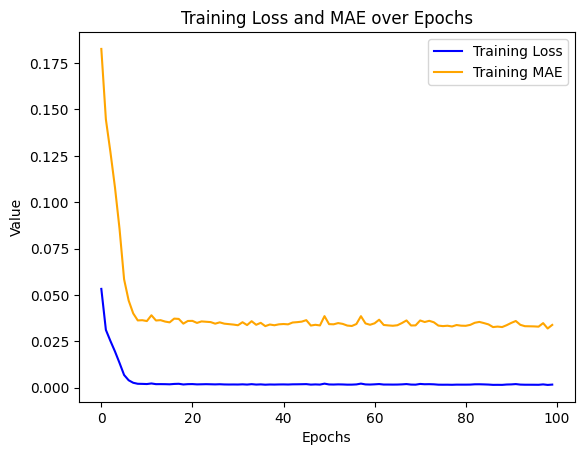

Test Loss: 0.0016970356227830052, Test MAE: 0.03628452122211456


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential([tf.keras.layers.Dense(5, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(10, activation="sigmoid", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(1, activation="linear", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))])

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')